# EXPLORE BIOMODELS

In [1]:
import sirn.constants as cnn
from sirn.model_serializer import ModelSerializer
from sirn.network import Network
import sirn.constants as cn

import os 

import copy
import numpy as np
import pandas as pd
import tellurium as te
from typing import List
import matplotlib.pyplot as plt
import tellurium as te

In [2]:
!pwd

/Users/jlheller/home/Technical/repos/sirn/notebooks


In [3]:
MODEL_DIR = "/Users/jlheller/home/Technical/repos/sirn/data"
SERIALIZATION_FILE = os.path.join(MODEL_DIR, "biomodels_serialized.txt")

In [4]:
serializer = ModelSerializer(MODEL_DIR, serialization_file=SERIALIZATION_FILE)
network_collection = serializer.deserialize()
BIOMODEL_NETWORKS = network_collection.networks

In [5]:
num_reactions = [n.num_reaction for n in network_collection.networks]
num_species = [n.num_species for n in network_collection.networks]

/var/folders/02/lb248q1j50dch2pthzkvxmpr0000gn/T/ipykernel_78805/1375890876.py:1: RuntimeWarning:

divide by zero encountered in log10



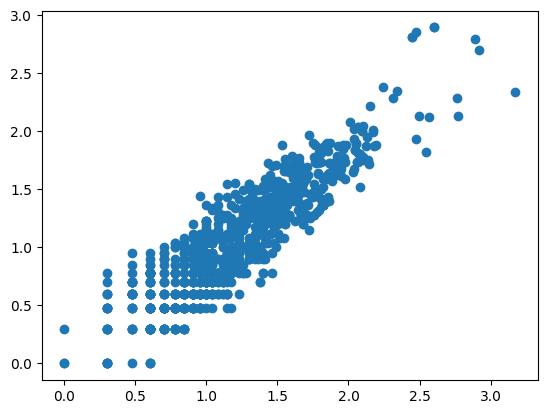

In [6]:
plt.scatter(np.log10(num_reactions), np.log10(num_species))

# Oscillator

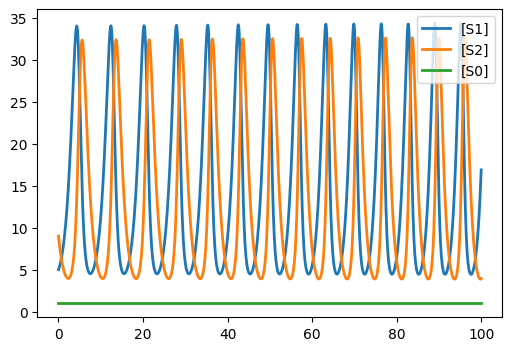

In [7]:
oscillator_model = """
S1 + S2 -> S1 + S1; k1*S1*S2
S2 -> S2 + S2; k2*S2
S0 + S1 -> S0; k3*S0*S1
k1 = 9.63869
k2 = 140.9346
k3 = 130.1286
S0 = 1.0
S1 = 5.0
S2 = 9.0
"""
rr = te.loada(oscillator_model)
rr.simulate(0, 100, 1000)
rr.plot()

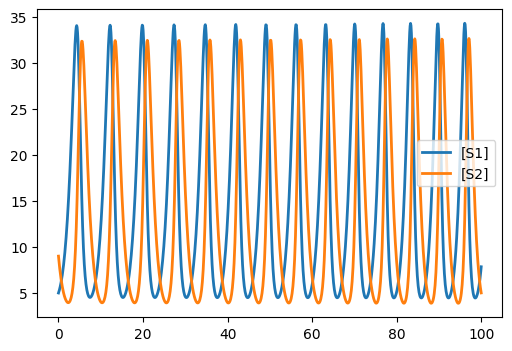

In [8]:
oscillator_model = """
J1: S1 + S2 -> S1 + S1; k1*S1*S2
J2: S2 -> S2 + S2; k2*S2
J3: S1 -> ; k3*S1
k1 = 9.63869
k2 = 140.9346
k3 = 130.1286
S0 = 1.0
S1 = 5.0
S2 = 9.0
"""
rr = te.loada(oscillator_model)
rr.simulate(0, 100, 1000)
rr.plot()

In [9]:
oscillator_network = Network.makeFromAntimonyStr(oscillator_model)
print(oscillator_network)

8535152: 2 species, 3 reactions
  J1: S1 + S2 -> 2.0 S1
  J2: S2 -> 2.0 S2
  J3: S1 -> 


In [10]:
oscillator_network.isStructurallyIdentical(BIOMODEL_NETWORKS[0])

StructurallyIdenticalResult(assignment_pairs=[]; is_truncated=False;

In [11]:
%%time
for network in BIOMODEL_NETWORKS:
    if network:
        result = oscillator_network.isStructurallyIdentical(network)
        if result:
            print("Found a match")
            break
    

CPU times: user 1min 3s, sys: 1min 49s, total: 2min 53s
Wall time: 29.5 s


# Creating networks of oscillators

In [12]:
!pwd

/Users/jlheller/home/Technical/repos/sirn/notebooks


In [13]:
OSCILLATOR_SERIAIZED_FILE = "/Users/jlheller/home/Technical/repos/sirn/data/Oscillators_June_11_A_2024_6877_serializers.txt"

In [14]:
serializer = ModelSerializer(MODEL_DIR, serialization_file=OSCILLATOR_SERIAIZED_FILE)
oscillator_collection = serializer.deserialize()

In [15]:
len(oscillator_collection)

6877

In [16]:
def searchBiomodels(oscillator_networks):
    matched_result = []
    for idx, o_network in enumerate(oscillator_networks):
        print(f"Processing oscillator network {o_network.network_name}")
        for b_network in BIOMODEL_NETWORKS:
            if b_network:
                result = o_network.isStructurallyIdentical(b_network, is_subset=True, identity=cn.ID_WEAK)
                if result:
                    matched_result.append((o_network, b_network, result))
                    print(f"Found match for {idx} {o_network.network_name}, {b_network.network_name}")

In [17]:
searchBiomodels(oscillator_collection.networks)

Processing oscillator network MA9ZZtJD_JaILTAJ_4688_17
Processing oscillator network MdMVPLTo_1E32XDM_2135_14
Processing oscillator network MpTXFPic_L1fxWgJ_4814_63
Processing oscillator network MrbhALsG_krYlCTK_792_36
Processing oscillator network MQG2gkBi_FtCJsti_1970_64
Processing oscillator network MMdbyy4o_5waIT9x_1495_25
Processing oscillator network MrlLJh98_8N9CzAD_1979_23
Processing oscillator network McY9pzId_UexsgNK_4521_55
Processing oscillator network MZqNtTYV_g4iSz0Y_1213_9
Processing oscillator network Mr4vbx5c_FxT8bIy_4231_25
Processing oscillator network MEHpS9KZ_boG6tu6_3710_14
Processing oscillator network MEORO2V6_XNjHlfQ_4789_33
Processing oscillator network MVUTQJoF_6rWGbFz_1645_9
Processing oscillator network M2Owxiql_wbKzpHx_1385_12
Processing oscillator network MQ2n8QhE_bWmk7aU_2545_10
Processing oscillator network MOljq42h_9zAUkBN_4405_36
Processing oscillator network MXVDEA8X_7XwgLFD_2894_69
Processing oscillator network MV8a0R9q_HNvf2fk_1908_9
Processing osc

assignments:  89%|████████▉ | 134803564420/151377253258 [19:45:00<1:18:54, 3500536.72it/s] IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

assignments: 100%|██████████| 151377253258/151377253258 [21:55:00<00:00, 1918574.24it/s]  


Found match for 165 M9ODQLMW_XrH3X2B_4148_25, BIOMD0000000608


assignments: 100%|██████████| 964278/964278 [00:00<00:00, 2991900.53it/s]


Found match for 165 M9ODQLMW_XrH3X2B_4148_25, BIOMD0000000695


assignments: 100%|██████████| 268283568/268283568 [01:00<00:00, 4398230.44it/s]


Found match for 165 M9ODQLMW_XrH3X2B_4148_25, BIOMD0000000480


assignments: 100%|██████████| 35714/35714 [00:00<00:00, 17287406.01it/s]


Found match for 165 M9ODQLMW_XrH3X2B_4148_25, BIOMD0000000872
Processing oscillator network MaCHhuvI_Um80v7v_4456_11
Processing oscillator network MoySuTvp_Swarrup_3011_36
Processing oscillator network Mu9benbJ_1ueyT7r_473_10
Processing oscillator network MxEPgDl6_VNGt1Ea_4270_5


Process Process-14:
Traceback (most recent call last):
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/jlheller/home/Technical/repos/sirn/src/sirn/assignment_evaluator_worker.py", line 63, in do
    assignment_pairs = worker.evaluateAssignmentArrays(process_idx, total_process, row_assignment_arr,
  File "/Users/jlheller/home/Technical/repos/sirn/src/sirn/assignment_evaluator_worker.py", line 206, in evaluateAssignmentArrays
    raise ValueError("Number of reference columns does not match the number of row assignments")
ValueError: Number of reference columns does not match the number of row assignments
Process Process-15:
Traceback (most recent call

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/jlheller/home/Technical/repos/sirn/irn/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3550, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/02/lb248q1j50dch2pthzkvxmpr0000gn/T/ipykernel_78805/2948796591.py", line 1, in <module>
    searchBiomodels(oscillator_collection.networks)
  File "/var/folders/02/lb248q1j50dch2pthzkvxmpr0000gn/T/ipykernel_78805/3064716057.py", line 7, in searchBiomodels
    result = o_network.isStructurallyIdentical(b_network, is_subset=True, identity=cn.ID_WEAK)
  File "/Users/jlheller/home/Technical/repos/sirn/src/sirn/network.py", line 188, in isStructurallyIdentical
  File "/Users/jlheller/home/Technical/repos/sirn/src/sirn/assignment_evaluator.py", line 208, in parallelEvaluate
    for procnum in range(actual_num_process):
  File "<string>", line 2, in __getitem__
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versio

In [ ]:
[(i, n.network_name) for i, n in enumerate(oscillator_collection.networks) if n.network_name == "MrVijviZ_8flbegF_2622_25"]

In [ ]:
searchBiomodels(BIOMODEL_NETWORKS[5:7])

In [ ]:
[(i, n.num_species, n.num_reaction) for i, n in enumerate(BIOMODEL_NETWORKS[:20])]

# A matched oscillator network

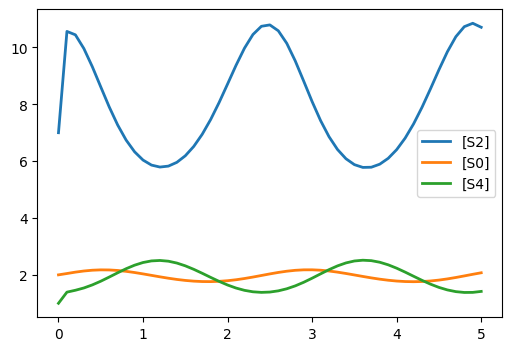

In [18]:
matched_model = """
// M9ODQLMW_XrH3X2B_4148_25
$S3 -> S2;  S3*19.3591127845924;
S0 -> S4 + S0;  S0*10.3068257839885;
S4 + S2 -> S4;  S4*S2*13.8915863630362;
S2 -> S0 + S2;  S2*0.113616698747501;
S4 + S0 -> S4;  S4*S0*0.240788980014622;
S2 -> S2 + S2;  S2*1.36258363821544;
S2 + S4 -> S2;  S2*S4*1.37438814584166;

S0 = 2; S1 = 5; S2 = 7; S3 = 10; S4 = 1;
"""
rr = te.loada(matched_model)
rr.simulate()
rr.plot()


# Bugs

Search failed

In [ ]:
bug_network = """
//MxEPgDl6_VNGt1Ea_4270_5

S0 + S4 -> S4 + S4; S0*S4*0.366761065227911;
S0 + $S2 -> S0 + S0; S0*S2*0.979033777397126;
S4 -> $S1;  S4*0.517079830076545;
S4 -> $S1 + $S3;  S4*1.0408536597155;

S0 = 2; S1 = 5; S2 = 7; S3 = 10; S4 = 1;  
"""